In [1]:
!pip install neurokit2
!pip install -U scikit-learn

     |████████████████████████████████| 1.1 MB 4.9 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip -d /content/training_set

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip
  inflating: /content/training_set/S001_128.mat  
  inflating: /content/training_set/S001_128_ann.mat  
  inflating: /content/training_set/S001_128_rpk.mat  
  inflating: /content/training_set/S002_128.mat  
  inflating: /content/training_set/S002_128_ann.mat  
 extracting: /content/training_set/S002_128_rpk.mat  
  inflating: /content/training_set/S003_128.mat  
  inflating: /content/training_set/S003_128_ann.mat  
  inflating: /content/training_set/S003_128_rpk.mat  
  inflating: /content/training_set/S004_128.mat  
  inflating: /content/training_set/S004_128_ann.mat  
 extracting: /content/training_set/S004_128_rpk.mat  
  inflating: /content/training_set/S005_128.mat  
  inflating: /content/training_set/S005_128_ann.mat  
  inflating: /content/training_set/S005_128_rpk.mat  
  inflating: /content/training_set/S006_128.mat  
  inflating: /content/training_set/S006_128_ann.mat  
  inflating: /co

In [118]:
import numpy as np
import neurokit2 as nk
import pandas as pd
import math

In [61]:
from scipy.io import loadmat
import numpy as np, os, sys, joblib

ecg = np.asarray(loadmat('/content/training_set/S001_128.mat')['ecg'], dtype=np.float64)
sampling=128
ecg.shape

(230400, 2)

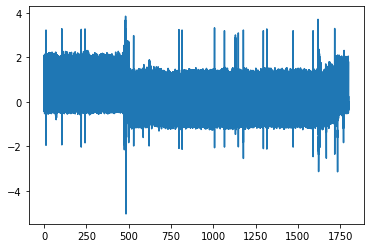

In [93]:
import matplotlib.pyplot as plt
ecg_= np.arange(0, ecg.shape[0]/sampling, 1/sampling)
plt.plot(ecg_, ecg[:,0])

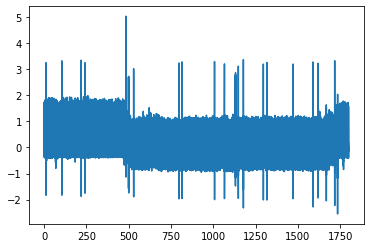

In [222]:
#clean ecg

ecg_signal = nk.ecg_clean(ecg[:,0], sampling_rate=sampling, method='neurokit2')

plt.plot(ecg_, ecg_signal)

In [240]:
_,rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling)
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")

In [241]:
rpeaks

{'ECG_R_Peaks': array([   108,    189,    269, ..., 230182, 230259, 230335]),
 'sampling_rate': 128}

In [242]:
waves_peak.keys()

dict_keys(['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])

In [243]:
#drop null values
for key in waves_peak.keys():
 waves_peak[key] = [w for w in waves_peak[key] if math.isnan(w) == False]

In [244]:
#create waves_peak in time domain in order to plot the value in the time domain
waves_peak_td = dict()
waves_peak_td['ECG_P_Peaks'] = [w / sampling for w in waves_peak['ECG_P_Peaks'] ]
waves_peak_td['ECG_Q_Peaks'] = [w / sampling for w in waves_peak['ECG_Q_Peaks'] ]
waves_peak_td['ECG_T_Peaks'] = [w / sampling for w in waves_peak['ECG_T_Peaks'] ]
waves_peak_td['ECG_R_Onsets'] = [w / sampling for w in waves_peak['ECG_R_Onsets'] ]
waves_peak_td['ECG_P_Onsets'] = [w / sampling for w in waves_peak['ECG_P_Onsets'] ]
waves_peak_td['ECG_T_Offsets'] = [w / sampling for w in waves_peak['ECG_T_Offsets'] ]

(-1.0, 3.0)

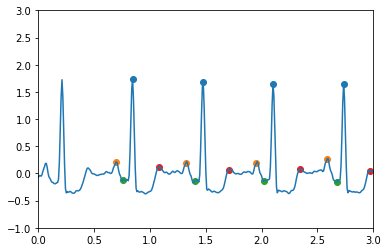

In [251]:
plt.plot(ecg_, ecg_signal)
plt.scatter(rpeaks['ECG_R_Peaks']/sampling, ecg_signal[rpeaks['ECG_R_Peaks']])
plt.scatter(waves_peak_td['ECG_P_Peaks'], ecg_signal[waves_peak['ECG_P_Peaks']])
plt.scatter(waves_peak_td['ECG_Q_Peaks'], ecg_signal[waves_peak['ECG_Q_Peaks']])
plt.scatter(waves_peak_td['ECG_T_Peaks'], ecg_signal[waves_peak['ECG_T_Peaks']])

plt.xlim(0,3)
plt.ylim(-1,3)

In [250]:
#Metrics of the first beat showed in the ECG
PR = waves_peak_td['ECG_R_Onsets'][0] - waves_peak_td['ECG_P_Onsets'][0] 
QR = waves_peak_td['ECG_T_Offsets'][0] - waves_peak_td['ECG_R_Onsets'][0]

print("PR interval is ", PR, "seconds long" )
print("QR interval is ", QR, "seconds long")

PR interval is  0.140625 seconds long
QR interval is  0.3359375 seconds long
